In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

##### UNDERSTANDING THE IDEA:

1. we simulate a lot of data,
1. a cone is a cone from the point (0, 0) in chosen direction (with so sub-angles)
1. I divide the area with different cones and I count how many points are there inside the cone above new circle with radius r,
1. then we divide this count by the number of all points outside of a circle with radius r and this is the spectral mass of a point on a circle,
1. simulate a random vector (symmetric case from List 4) with many observations (at least 10,000, the best 100,000),
1. parameteres are r, n (number of cones), data,
1. to check if a point is inside the cone we check if the distance is bigger than r and the we calculate an angle,
1. the output will be angles with the masses with the spectral measures.

In [2]:
# function to generate stable vector 

def simStableVector(alpha, s, gamma, mu0, n, N):
    X = []
    Y = []
    if alpha != 1:
        for i in range(N):
            Z = levy_stable.rvs(alpha, 1, loc=0, scale=1, size=n)
            x = np.sum([gamma[j]**(1/alpha)*Z[j]*s[j][0] for j in range(n)]) + mu0[0]
            y = np.sum([gamma[j]**(1/alpha)*Z[j]*s[j][1] for j in range(n)]) + mu0[1]
            X.append(x)
            Y.append(y)
        return X, Y
    else:
        pass

In [3]:
# function to calculate spectral measure

def spectralMeasure(r, n, data):
    newData = []
    gammas = []
    angles = list(zip([360*i/n for i in range(n)], [360*(i+1)/n for i in range(n)]))
    for i in data:
        if np.sqrt(i[0]**2 + i[1]**2) > r:
            newData.append(i)       
    for c in range(n):
        cone = []
        for i in newData:
            angle = np.degrees(np.arctan2(i[1], i[0])) % 360
            if angles[c][0] < angle < angles[c][1]:
                cone.append(i)
        if len(newData) > 0:
            gamma = np.round(len(cone)/len(newData), 4)
            gammas.append(gamma) 
        else:
            gammas.append('null')
    return newData, gammas

In [4]:
# function to find r for which differences between gammas are the smallest 
# (also returns) all differences and rs

def spectralMeasureComparison(rList, n, alpha, s, gamma, mu, N):
    diffs = []
    estimatedGammas = []
    rNew = []
    xs, ys = simStableVector(alpha, s, gamma, mu, n, N)
    data = list(zip(xs, ys))
    for r in rList:
        newData, newGammas = spectralMeasure(r, n, data)
        if 'null' in newGammas:
            continue
        rNew.append(r)
        d = []
        for i in range(len(newGammas)):
            d.append(abs(gamma[i] - newGammas[i]))
        estimatedGammas.append(newGammas)
        diffs.append(sum(d))
    idx = diffs.index(min(diffs))
    return rNew, diffs, gamma, estimatedGammas[idx], rList[idx]

In [5]:
# function to plot stable vectors

def plotStableVector(alpha, s, gamma, mu, n, N, showPlot = False):
    xs, ys = simStableVector(alpha, s, gamma, mu, n, N)
    data = list(zip(xs, ys))
    if showPlot == True:
        plt.figure(figsize = (6, 6))
        plt.scatter(xs, ys, s=1, c='black')
        plt.title(f'Simulation of stable vector for alpha = {alpha} and {n} mass points')
        plt.show()
    else:
        return data

In [6]:
# generate a few sets of variable to calculate spectral measures

alphas = [1.1, 1.5, 1.9]
d = 2
ns = [4, 6]
mu = (0, 0)
N = 10000
gammas = ([0.2, 0.5, 0.2, 0.1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ss = (
    [(1, 0), (0, 1), (-1, 0), (0, -1)],
    [(1, 0), (1/2, np.sqrt(3)/2), (-1/2, np.sqrt(3)/2), (-1, 0), (-1/2, -np.sqrt(3)/2), (1/2, -np.sqrt(3)/2)]
)
rs = list(range(1, 10001, 10))

For alpha = 1.1 and 4 number of points:
theoretical gammas - [0.2, 0.5, 0.2, 0.1]
empirical gammas - [0.2195, 0.3537, 0.1951, 0.2317]
the best value of r - 51
histogram of differences between gammas:


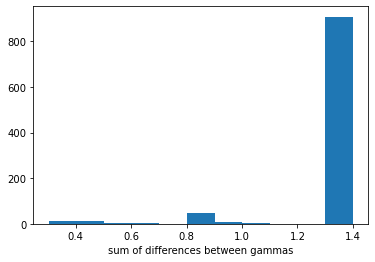

scatterplot of differences for different r:


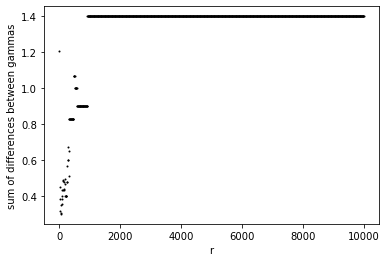

For alpha = 1.1 and 6 number of points:
theoretical gammas - [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
empirical gammas - [0.0743, 0.1881, 0.1733, 0.1188, 0.1436, 0.302]
the best value of r - 41
histogram of differences between gammas:


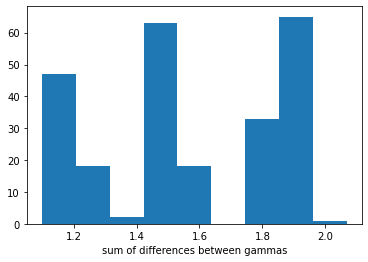

scatterplot of differences for different r:


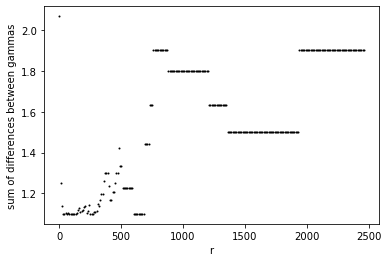

For alpha = 1.5 and 4 number of points:
theoretical gammas - [0.2, 0.5, 0.2, 0.1]
empirical gammas - [0.1765, 0.4118, 0.2353, 0.1765]
the best value of r - 41
histogram of differences between gammas:


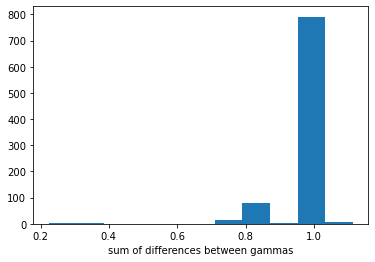

scatterplot of differences for different r:


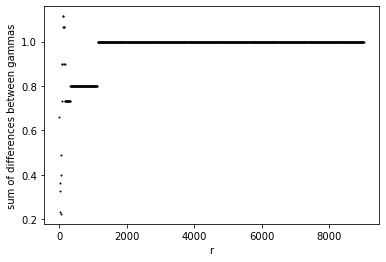

For alpha = 1.5 and 6 number of points:
theoretical gammas - [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
empirical gammas - [0.0769, 0.1026, 0.2051, 0.2821, 0.1026, 0.2308]
the best value of r - 41
histogram of differences between gammas:


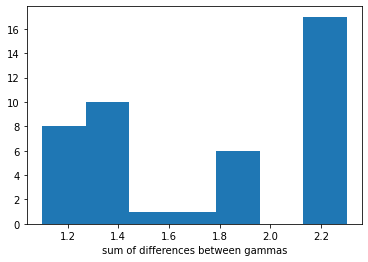

scatterplot of differences for different r:


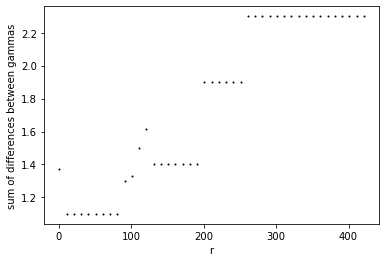

For alpha = 1.9 and 4 number of points:
theoretical gammas - [0.2, 0.5, 0.2, 0.1]
empirical gammas - [0.0, 0.5556, 0.3333, 0.1111]
the best value of r - 11
histogram of differences between gammas:


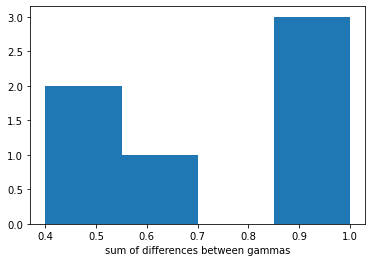

scatterplot of differences for different r:


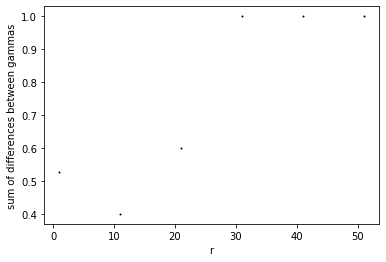

For alpha = 1.9 and 6 number of points:
theoretical gammas - [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
empirical gammas - [0.04, 0.04, 0.24, 0.24, 0.32, 0.12]
the best value of r - 11
histogram of differences between gammas:


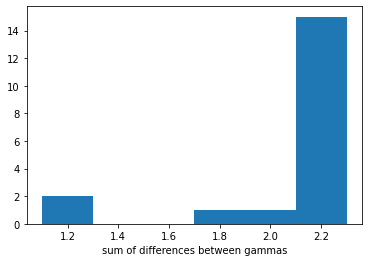

scatterplot of differences for different r:


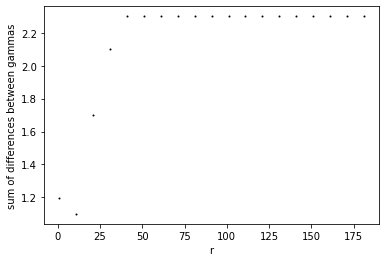

In [10]:
# results for some input
# please check this scatter plot because it looks like shit and I do not believe it
# we can leave histograms because they're quite nuce but maybe you can make them look better?

for i in range(len(alphas)):
    for j in range(len(ns)):
        newRs, diffs, theoG, estG, r = spectralMeasureComparison(rs, ns[j], alphas[i], ss[j], gammas[j], mu, N)
        print(f'For alpha = {alphas[i]} and {ns[j]} number of points:')
        print(f'theoretical gammas - {theoG}')
        print(f'empirical gammas - {estG}')
        print(f'the best value of r - {r}')
        print('histogram of differences between gammas:')
        plt.hist(diffs, bins = 'auto')
        plt.xlabel('sum of differences between gammas')
        plt.show()
        print('scatterplot of differences for different r:')
        plt.scatter(newRs, diffs, s = 1, c = 'black')
        plt.xlabel('r')
        plt.ylabel('sum of differences between gammas')
        plt.show()

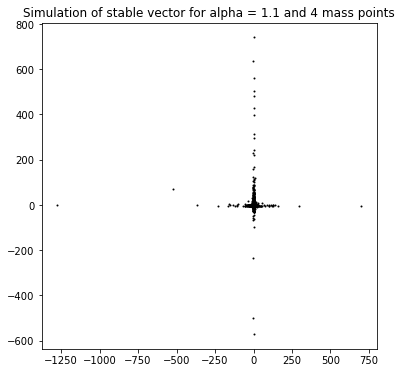

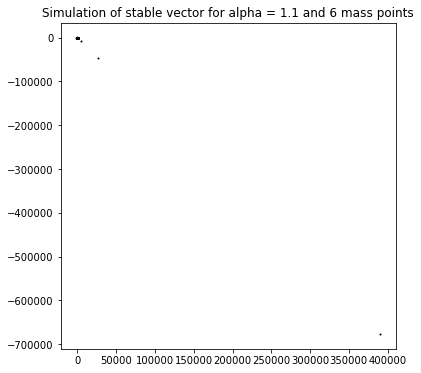

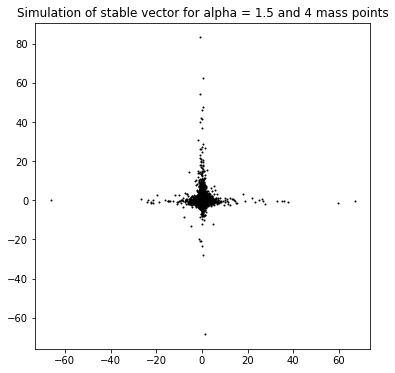

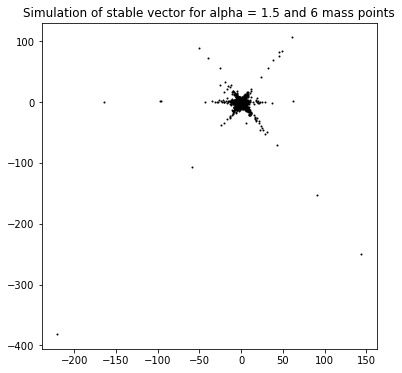

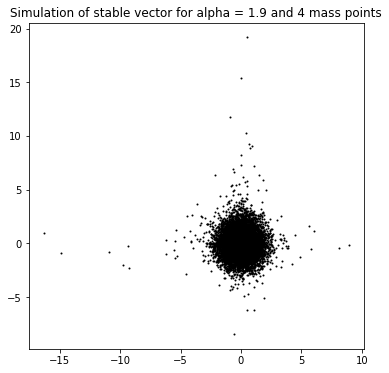

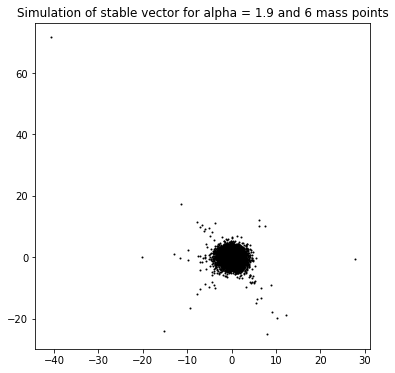

In [11]:
# some plots of data
# do you think we can leave it? it's not bad but... I don't know if necessary

for i in range(len(alphas)):
    for j in range(len(ns)):
        plot = plotStableVector(alphas[i], ss[j], gammas[j], mu, ns[j], N, showPlot = True)